In [30]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df=pd.read_csv('Mall_Customers.csv')

In [32]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


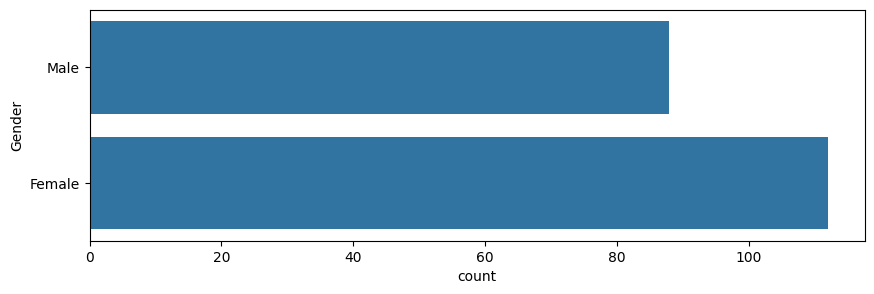

In [35]:
plt.figure(1 , figsize = (10 , 3))
sns.countplot(y = 'Gender' , data = df)
plt.show()

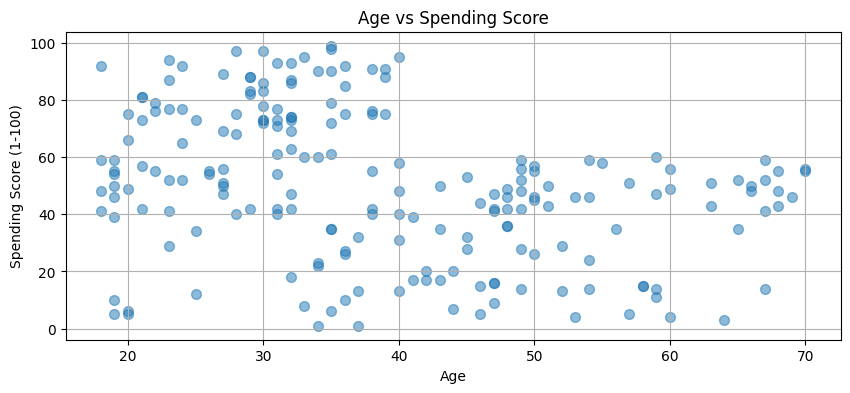

In [36]:
age = df['Age']
spending_score = df['Spending Score (1-100)']
plt.figure(figsize=(10, 4))
plt.scatter(age, spending_score, s=50, alpha=0.5)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [37]:
from sklearn.cluster import KMeans

In [38]:
wcs=[]
for i in range(1,20):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmean.fit(x)
    wcs.append(kmean.inertia_)

In [39]:
wcs

[269981.28,
 184609.98434090626,
 106348.37306211122,
 82472.19413919412,
 44448.4554479337,
 37455.98455516028,
 32277.023173884936,
 30659.650406115627,
 23770.116981207197,
 21775.64608111187,
 19290.207589048383,
 17827.131139773017,
 14971.026961342752,
 14294.932338421815,
 13018.938471177946,
 11867.359683299159,
 10369.09301663249,
 9907.693183716869,
 9504.62016784385]

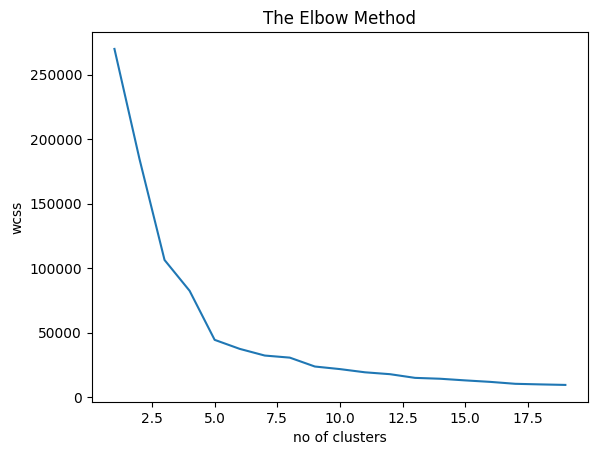

In [40]:

plt.plot(range(1,20),wcs)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()


In [41]:
kmean=KMeans(n_clusters=i,init='k-means++',random_state=30)

In [42]:
kmean.fit(x)

KMeans(n_clusters=19, random_state=30)

In [43]:
x['cluster number']=kmean.fit_predict(x)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12444\565382389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster number']=kmean.fit_predict(x)


In [44]:
x

,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,12
1,15,81,11
2,16,6,3
3,16,77,11
4,17,40,12
...,...,...,...
195,120,79,8
196,126,28,16
197,126,74,8
198,137,18,16
